In [1]:
#Importes
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msng

In [2]:
#Carga datasets
df = pd.read_csv(r'.\Data\Matricula_Admisión2024\ArchivoMatr_Adm2024.csv', sep=';')
df1 = pd.read_csv(r'.\Data\Inscritos_Admisión2024\ArchivoB_Adm2024.csv', sep=';') 
df1_codigocomuna = pd.read_excel(r'.\Data\Inscritos_Admisión2024\Libro_CódigosADM2024_ArchivoB.xlsx',sheet_name=2).iloc[:,[1,4,5]]


In [3]:
df1_codigocomuna.rename(columns={'COD.COMUNA': 'CODIGO_COMUNA_D', 'COM NOMBRE': 'COM_NOMBRE'},inplace=True)
df1_codigocomuna.head()

,REGION NOMBRE,CODIGO_COMUNA_D,COM_NOMBRE
0,REGION DE ARICA Y PARINACOTA,15101,ARICA
1,REGION DE ARICA Y PARINACOTA,15102,CAMARONES
2,REGION DE ARICA Y PARINACOTA,15201,PUTRE
3,REGION DE ARICA Y PARINACOTA,15202,GENERAL LAGOS
4,REGION DE TARAPACA,1101,IQUIQUE


In [4]:
df.head()

,ID_aux,CODIGO_UNIV,CODIGO,VIA,PREFERENCIA,PTJE_POND,TIPO_MATRICULA
0,id_690126976014,51,51111,1,1,"709,9",1
1,id_831408370144,18,18075,1,1,"713,45",1
2,id_752607579265,44,44049,1,1,"876,1",1
3,id_772307770236,21,21043,1,1,"643,3",2
4,id_481904877199,41,41067,1,1,"638,7",1


In [5]:
df1.head()

,ID_aux,ANYO_PROCESO,FECHA_NACIMIENTO,RBD,COD_ENS,REGIMEN,RAMA_EDUCACIONAL,GRUPO_DEPENDENCIA,ANYO_EGRESO,CODIGO_REGION,CODIGO_PROVINCIA,CODIGO_COMUNA,CODIGO_REGION_D,CODIGO_COMUNA_D,SITUACION_EGRESO,BEA,PACE,PAIS_NACIMIENTO,SEXO,INGRESO_PERCAPITA_GRUPO_FA
0,id_5846558574617,2024,12006,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,NaN,NaN,210,1,1
1,id_9063590676377,2024,72005,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,NaN,NaN,210,2,3
2,id_9653596675339,2024,122005,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,BEA,PACE,210,1,6
3,id_096902947324,2024,52004,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,NaN,NaN,244,1,99
4,id_9610596071061,2024,112005,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,NaN,NaN,210,1,99


In [6]:
df2 = pd.merge(right=df, left=df1, on='ID_aux', how='left' )[['ID_aux','PTJE_POND','CODIGO_COMUNA_D']] # Seleccion de columnas de interez
df2.dropna(subset = ['PTJE_POND'], inplace=True) # drop notas Nan
df2 = pd.merge(df2, df1_codigocomuna, on="CODIGO_COMUNA_D", how='left') # Mapear las comunas
df2['PTJE_POND'] = df2['PTJE_POND'].str.replace(',', '.', regex=False).astype(float) #Cambiar , para convertir a punto flotante
df2 = df2.drop(df2[df2['PTJE_POND'] == 0].index) # Puntaje ponderado = 0 suena a error o nan
df2

,ID_aux,PTJE_POND,CODIGO_COMUNA_D,REGION NOMBRE,COM_NOMBRE
0,id_5846558574617,499.70,15101,REGION DE ARICA Y PARINACOTA,ARICA
1,id_9095590479500,661.75,15101,REGION DE ARICA Y PARINACOTA,ARICA
2,id_2727527272759,618.70,15101,REGION DE ARICA Y PARINACOTA,ARICA
3,id_9654596875442,712.60,15101,REGION DE ARICA Y PARINACOTA,ARICA
4,id_9035590573585,655.55,15101,REGION DE ARICA Y PARINACOTA,ARICA
...,...,...,...,...,...
118354,id_9627596472752,741.30,13601,REGION METROPOLITANA DE SANTIAGO,TALAGANTE
118355,id_0895508679535,679.00,13125,REGION METROPOLITANA DE SANTIAGO,QUILICURA
118356,id_1595515379547,601.15,13127,REGION METROPOLITANA DE SANTIAGO,RECOLETA
118357,id_0996509579630,543.60,13122,REGION METROPOLITANA DE SANTIAGO,PEÑALOLEN


In [7]:
reg_res=['Atacama', 'Los Lagos', 'Arica', 'La Araucania', 'Tarapaca', 'Los Rios', 'Lib. Gen.\nBernardo O.', 'Coquimbo', 'Biobio', 'Valparaiso', 'Aysen', 'Antofagasta', 'Maule', 'Metropolitana', 'Ñuble', 'Magallanes' ]

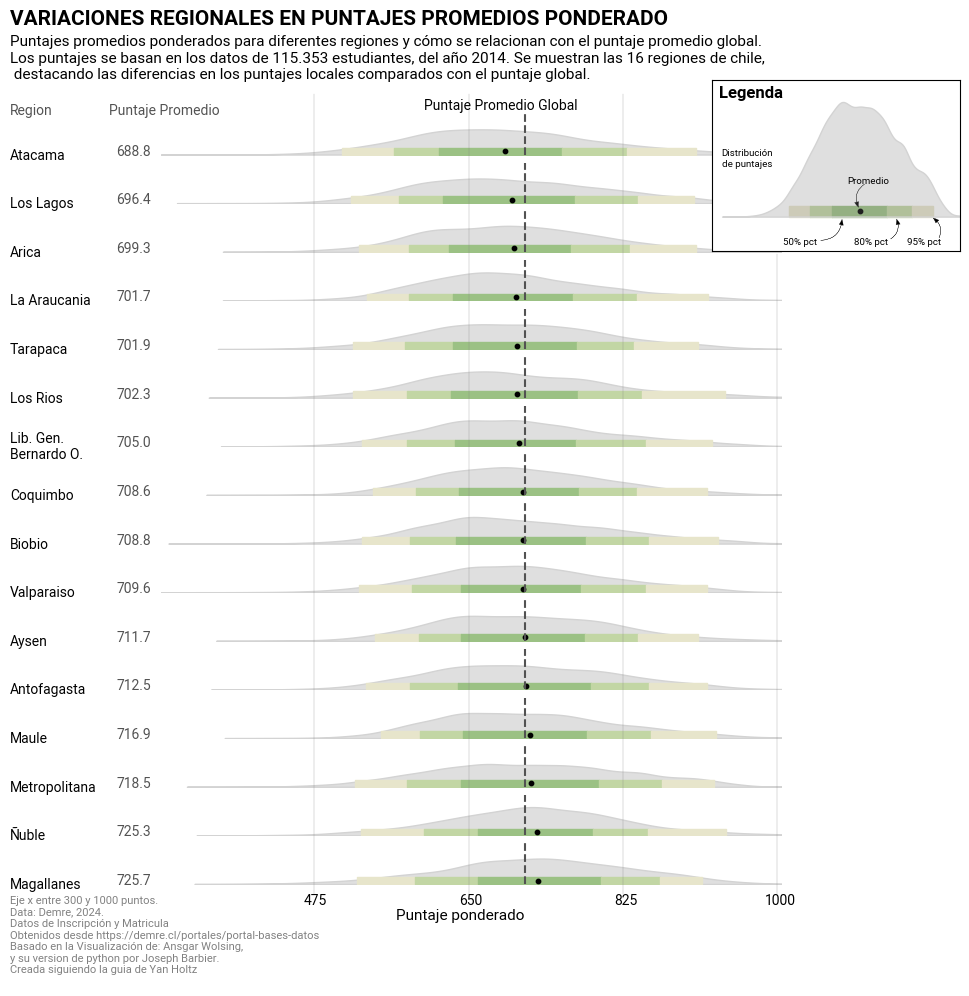

In [8]:
fig, axs = plt.subplots(nrows=16, ncols=1, figsize=(8, 10))
axs = axs.flatten() # necesario para acceder a cada eje individual
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lightgreen = '#E7E5CB'
colors = [lightgreen, midgreen, darkgreen, midgreen, lightgreen]

darkgrey = '#525252'

# iterar sobre los ejes
regiones = df2.groupby('REGION NOMBRE')['PTJE_POND'].mean().sort_values().index.tolist()
for i, region in enumerate(regiones):

    # subconjunto de datos para cada región
    subset = df2[df2['REGION NOMBRE'] == region]

    # graficar la distribución de puntajes
    sns.kdeplot(
        subset['PTJE_POND'],
        fill=True,
        bw_adjust = 1,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # línea de referencia de la media global
    global_mean = df2['PTJE_POND'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # calcular los cuantiles
    quantiles = np.percentile(subset['PTJE_POND'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # rellenar el espacio entre cada par de cuantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # límite inferior
             quantiles[j+1]], # límite superior
            0, # minimo y=0
            0.001, # máximo y=0.001
            color=colors[j]
        )

    # valor medio como referencia
    mean = subset['PTJE_POND'].mean()
    axs[i].scatter([mean], [0.0005], color='black', s=10)

    # Puntaje promedio de la region en la izq
    axs[i].text(
        250, 0,
        f'{mean.round(1)}',
        ha='left',
        fontsize=10,
        fontfamily='Roboto',
        color=darkgrey
    )

    # region en la izq
    axs[i].text(
        130, 0,
        reg_res[i],
        ha='left',
        va='center',
        fontsize=10,
        fontproperties='Roboto',
        color='k'
    )

    # establecer título y etiquetas
    axs[i].set_xlim(300, 1000)

    axs[i].set_ylabel('')
    axs[i].set_ylim(0, 0.006)
    # eliminar el eje
    axs[i].set_axis_off()

values = [475, 650, 825, 1000]
for value in values:
    axs[-1].text(
        value, -0.003,
        f'{value}',
        ha='center',
        fontsize=10,
        fontfamily='Roboto'
        )

# puntaje promedio
text = 'Puntaje Promedio'
fig.text(
    0.06, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontfamily='Roboto',
    color=darkgrey
)
# region
text = 'Region'
fig.text(
    -0.063, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontfamily='Roboto',
    color=darkgrey
)
# puntaje promedio global
text = 'Puntaje Promedio Global'
fig.text(
    0.55, 0.885,
    text,
    ha='center',
    fontsize=10,
    fontfamily='Roboto'
)

# creditos
text = """
Eje x entre 300 y 1000 puntos.
Data: Demre, 2024.
Datos de Inscripción y Matricula
Obtenidos desde https://demre.cl/portales/portal-bases-datos
Basado en la Visualización de: Ansgar Wolsing, 
y su version de python por Joseph Barbier. 
Creada siguiendo la guia de Yan Holtz
"""
fig.text(
    -0.063, 0.01,
    text,
    ha='left',
    fontsize=8,
    fontfamily='Roboto',
    color='grey'
)

# label eje x
text = "Puntaje ponderado"
fig.text(
    0.5, 0.075,
    text,
    ha='center',
    fontsize=11,
    fontfamily='Roboto'
)

# descripcion
text = """
Puntajes promedios ponderados para diferentes regiones y cómo se relacionan con el puntaje promedio global. 
Los puntajes se basan en los datos de 115.353 estudiantes, del año 2014. Se muestran las 16 regiones de chile,
 destacando las diferencias en los puntajes locales comparados con el puntaje global.
"""
fig.text(
    -0.063, 0.9,
    text,
    ha='left',
    fontsize=11,
    fontfamily='Roboto'
)

# titulo
text = "Variaciones Regionales en Puntajes Promedios Ponderado".upper()
fig.text(
    -0.063, 0.97,
    text,
    ha='left',
    fontsize=15,
    fontfamily='Roboto',
    weight='semibold'
)

# background lines
from matplotlib.lines import Line2D
def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='grey',
        lw=0.2,
        transform=fig.transFigure,
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.74])

# legenda
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1,
    bbox_to_anchor=(0.3,0.8,1,1.2), bbox_transform=axs[0].transAxes
)
subax.set_xticks([])
subax.set_yticks([])
region_met = df2[df2['REGION NOMBRE'] == 'REGION METROPOLITANA DE SANTIAGO']
sns.kdeplot(
    region_met['PTJE_POND'],
    fill=True,
    ax=subax,
    color='grey',
    edgecolor='lightgrey',
    zorder=2
)
quantiles = np.percentile(region_met['PTJE_POND'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.0003, # max y=0.00004
        color=colors[j]
    )
subax.set_xlim(300, 1000)
subax.set_ylim(-0.001, 0.004)
mean = region_met['PTJE_POND'].mean()
subax.scatter([mean], [0.00015], color='black', s=10)
subax.text(
    320, 0.0035,
    'Legenda',
    ha='left',
    fontsize=12,
    fontfamily='Roboto',
    weight='semibold'
)
subax.text(
    400, 0.0015,
    'Distribución\nde puntajes',
    ha='center',
    fontsize=7,
    fontfamily='Roboto',
    weight='regular'
)
subax.text(
    mean+25, 0.001,
    'Promedio',
    ha='center',
    fontsize=7,
    fontfamily='Roboto',
    weight='regular'
)
subax.text(
    900, -0.0008,
    "95% pct",
    ha='center',
    fontsize=7,
    fontfamily='Roboto',
    weight='regular'
)
subax.text(
    750, -0.0008,
    "80% pct",
    ha='center',
    fontsize=7,
    fontfamily='Roboto',
    weight='regular'
)
subax.text(
    550, -0.0008,
    "50% pct",
    ha='center',
    fontsize=7,
    fontfamily='Roboto',
    weight='regular'
)
# flechas en la legenda
import matplotlib.patches as patches
def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=3, head_length=4"
    kw = dict(arrowstyle=style, color="k", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.0002), (mean+20, 0.001), subax) # mean
add_arrow((mean+100, 0), (mean+80, -0.0007), subax) # 80%
add_arrow((mean+200, 0), (mean+220, -0.0007), subax) # 95%
add_arrow((mean-50, 0.), (600, -0.0007), subax) # 50%



plt.show()

